In [22]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Exercicio 1
#### Resposta - 'Churn'¶


#### Exercicio 2
#### Resposta - from sklearn.module import Model - model = Model() - model.fit(X, y) - model.predict(X_new)


#### Exercicio 3

In [2]:
churn_df = pd.read_csv('telecom_churn_clean.csv')

In [3]:
churn_df


,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [4]:
y=churn_df['churn'].values
X=churn_df[['account_length','customer_service_calls']].values

In [5]:
knn = KNeighborsClassifier(n_neighbors=6)

In [6]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [7]:
X_new=np.array([[30.0,17.5],[107.0,24.1],[213.0,10.9]])

In [8]:
y_pred=knn.predict(X_new)

In [9]:
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


#### Exercício 4

In [10]:
X=churn_df.drop('churn', axis=1).values
y=churn_df['churn'].values

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
print("Accuracy:", knn.score(X_test, y_test))

Accuracy: 0.8545727136431784


#### Exercício 5


In [17]:
neighbors= np.arange(1,13)
train_accuracies = {}
test_accuracies={}

In [20]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor]=knn.score(X_train, y_train)
    test_accuracies[neighbor]=knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


#### Exercício 6

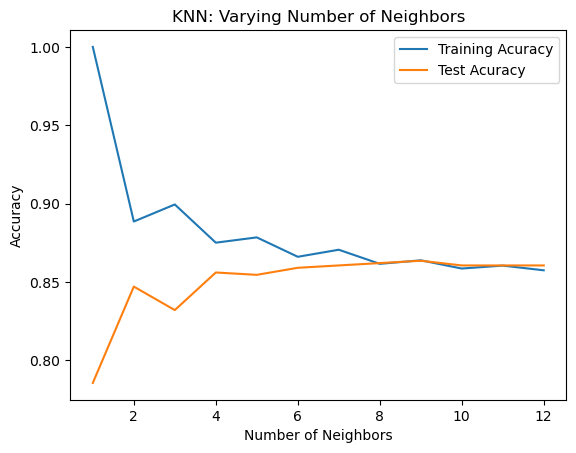

In [33]:
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracies.values(), label='Training Acuracy')
plt.plot(neighbors, test_accuracies.values(), label='Test Acuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()